<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-01-tree-based-models-decision-tree-cart-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.1 CART (Classification and Regression Trees)

CART is a powerful and widely used algorithm for building decision trees. It can be applied to both classification and regression problems, making it a versatile tool in machine learning. The algorithm works by recursively partitioning the data into subsets based on feature values, creating a tree structure that represents the decision-making process.




## Overview

CART (Classification and Regression Trees) is a decision tree algorithm developed by Breiman, Friedman, Olshen, and Stone in 1984. It is a versatile machine learning method used for both `classification` and `regression` tasks. CART builds a binary decision tree by recursively splitting the dataset into two subsets based on feature thresholds, optimizing an impurity or error criterion. It is widely used due to its simplicity, interpretability, and ability to handle mixed data types (numerical and categorical).


### Key Characteristics of CART

-   `Splitting`: Creates **binary splits** (e.g., `X <= t` vs. `X > t`) at each node.
    -   Classification: Predicts a categorical class label (e.g., `Species` in Iris).
    -   Regression: Predicts a continuous value (e.g., `medv` in Boston Housing).
-   `Splitting Criteria`:
    -   Classification: Gini impurity or entropy.
    -   Regression: Variance reduction or Mean Squared Error (MSE).
-   `Pruning`: Uses `cost-complexity pruning` to prevent overfitting by balancing tree complexity and error. -`Output`: A tree where leaf nodes predict the majority class (classification) or mean value (regression).
-   `Implementations`: `rpart` package in R, `sklearn.tree.DecisionTreeClassifier/Regressor` in Python.

### How CART Works

CART builds a decision tree by recursively partitioning the dataset, selecting splits that minimize impurity (classification) or error (regression). Below is a step-by-step explanation, including the mathematical foundation.

1. Initialize the Tree

-   Start with the entire dataset at the root node.

2. Select the Best Split

-   For each feature $X_j$ and possible threshold $t$, evaluate the split into two subsets:

   -   Left: $\{i : X_{ij} \leq t\}$.
   -   Right: $\{i : X_{ij} > t\}$.

-   Compute the impurity or error for each subset and the weighted average:

        
$$ \text{Impurity}_{\text{total}} = \frac{n_L}{n} \text{Impurity}(S_L) + \frac{n_R}{n} \text{Impurity}(S_R), $$


where $n_L$, $n_R$ are the number of observations in the left and right subsets, and $n$ is the total. - Choose the feature and threshold that minimize the total impurity/error.

3.  Splitting Criteri

-   **Classification**:

     
 - `Gini Impurity`: Measures the probability of misclassifying a randomly chosen observation:
  
  $$ G = 1 - \sum_{k=1}^K p_k^2, $$
  where $p_k$ is the proportion of class $k$ in the node.
  

-   `Entropy`(alternative): Measures uncertainty:

$$ H = -\sum_{k=1}^K p_k \log_2(p_k).$$

-   The split minimizes the weighted Gini/entropy of child nodes.

-   **Regression**:

    -   `Variance Reduction`: Measures the reduction in variance after the split:

$$ \text{Var} = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y})^2 $$ where $\bar{y}$ is the mean of the response in the node.

-   Alternatively, use MSE directly.
-   The split maximizes the reduction in total variance:

$$ \text{Reduction} = \text{Var}(\text{parent}) - \left( \frac{n_L}{n} \text{Var}(S_L) + \frac{n_R}{n} \text{Var}(S_R) \right) $$

4. Recurse:

-   Apply the best split to create two child nodes.
-   Repeat the splitting process for each child node unless a stopping criterion is met:
    -   Minimum node size (e.g., `minsplit` observations).
    -   Maximum tree depth.
    -   No significant impurity/error reduction (controlled by complexity parameter `cp`).
    -   Node is pure (all observations belong to one class or have the same value).

5. Build the Full Tree

-   Continue splitting until stopping criteria are met, creating a potentially large tree.

6.  Prune the Tree

-   Use `cost-complexity pruning` to simplify the tree and prevent overfitting.
-   `Cost-Complexity Criterion`:

$$ R_\alpha(T) = R(T) + \alpha \cdot |T| $$ where $R(T)$ is the tree’s error (misclassification rate for classification, MSE for regression), $|T|$) is the number of terminal nodes, and $\alpha$ is the complexity parameter (`cp`). - Select the smallest tree whose error is within one standard error of the minimum cross-validated error (via `cptable` in `rpart`).

6. Prediction

-   For a new observation, traverse the tree from the root to a leaf based on the feature values.
-   **Classification**: Return the majority class in the leaf.
-   **Regression**: Return the mean value in the leaf.


Here below the end-to-end flowchart of the CART algorithm:


![alt text](http://drive.google.com/uc?export=view&id=1vL4ZEsXmzLhnCmj9WWxb4ZdpPIql6G-q)





### Key Differences Between Classification and Regression

| **Aspect** | **Classification** | **Regression** |
|-------------------|---------------------------|--------------------------|
| **Output** | Discrete class labels | Continuous numerical values |
| **Splitting Criterion** | Gini, Entropy, Misclassification Error | Variance Reduction, MSE |
| **Leaf Node Output** | Majority class | Mean (or median) of target values |
| **Objective** | Maximize class purity | Minimize variance of target values |


### Advantages

-   `Interpretable`: Tree structure is easy to visualize and understand.
-   `Flexible`: Handles numerical, categorical, and missing data.
-   `Non-linear`: Captures complex relationships without assuming linearity.
-   `Feature Importance`: Provides measures based on impurity reduction.

### Disadvantages

-   `Overfitting`: Can create overly complex trees without pruning.
-   `Instability`: Sensitive to small data changes, leading to different trees.
-   `Bias`: Favors features with many split points (e.g., continuous or high-cardinality categorical features).

## Setup R in Python Runtype

### Install {rpy2}

{rpy2} is a Python package that provides an interface to the R programming language, allowing Python users to run R code, call R functions, and manipulate R objects directly from Python. It enables seamless integration between Python and R, leveraging R's statistical and graphical capabilities while using Python's flexibility. The package supports passing data between the two languages and is widely used for statistical analysis, data visualization, and machine learning tasks that benefit from R's specialized libraries.

In [ ]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.1
Uninstalling rpy2-3.5.1:
  Successfully uninstalled rpy2-3.5.1
  Using cached rpy2-3.5.1-cp311-cp311-linux_x86_64.whl


### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## CART (Classification and Regression Trees) from Scratch

mplementing CART (Classification and Regression Trees) from scratch in R without using packages is a complex task requiring manual construction of decision trees. Below, I provide a detailed step-by-step guide to build a basic CART algorithm for both classification (using the Iris dataset) and regression (using the Boston Housing dataset). Since you’ve requested no R packages, I’ll avoid using libraries like rpart or tree and rely on base R. I’ll also assume access to the Iris and Boston Housing datasets, which are commonly available (e.g., Iris is built into R, and Boston Housing can be accessed via external sources or pre-loaded data).

The CART algorithm involves recursively splitting the input space into regions based on feature thresholds, using Gini impurity for classification and mean squared error (MSE) for regression to evaluate splits. I’ll implement a simplified version with the following components:

1. `Node structure`: Represent tree nodes.
2. `Splitting criteria`: Gini impurity for classification, MSE for regression.
3. `Tree building`: Recursive partitioning with a stopping criterion.
4. `Prediction`: Class or value prediction for new data.

Due to the complexity, the code will be kept functional but minimal, focusing on core logic. I’ll use the Iris dataset for classification (predicting species) and the Boston Housing dataset for regression (predicting median house value).


### Classification Example

For classification problem we will iris data. Thsi data contains 150 observations with 4 features (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) and a target variable `Species` (setosa, versicolor, virginica). We’ll build a classification tree to predict Species.

### Data

We will create a synthetic dataset that mimics the Iris dataset, ensuring that the features are numeric and the target variable is a factor. This will help us avoid issues with factor levels and ensure that the model can be trained effectively.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Number of observations
n <- 150

# Synthetic features mimicking Iris dataset
data <- data.frame(
  sepal_length = runif(n, 4, 8),       # Sepal length (range similar to Iris: 4.3 to 7.9)
  sepal_width = runif(n, 2, 4.5),      # Sepal width (range similar to Iris: 2.0 to 4.4)
  petal_length = runif(n, 1, 7),       # Petal length (range similar to Iris: 1.0 to 6.9)
  petal_width = runif(n, 0.1, 2.5),    # Petal width (range similar to Iris: 0.1 to 2.5)
  species = factor(sample(c("setosa", "versicolor", "virginica"), n, replace = TRUE,
                          prob = c(0.33, 0.33, 0.34)))  # Species with roughly equal distribution
)

# View the first few rows
head(data)

  sepal_length sepal_width petal_length petal_width   species
1     5.150310    4.118633     5.707452   1.3571742 virginica
2     7.153221    3.243818     1.056579   0.9395243    setosa
3     5.635908    2.969773     5.674395   0.6772737 virginica
4     7.532070    2.616122     5.376344   0.2396603 virginica
5     7.761869    2.277741     4.780791   0.6678874 virginica
6     4.182226    2.974986     3.885465   2.2361870    setosa


#### Define CART Functions for Classification

The following functions implement the core logic of the CART algorithm for classification using Gini impurity as the splitting criterion:

1. `gini_impurity(classes)`:
   - Calculates the Gini impurity for a node, measuring how mixed the classes are.
   - Formula: `1 - sum(proportions^2)`, where `proportions` are the fractions of each class.
   - Returns 0 if the node is empty or pure (one class).

2. `gini_split(left_classes, right_classes)`:
   - Computes the weighted Gini impurity for a split into left and right nodes.
   - Weights the Gini impurity of each node by its size relative to the total size.
   - Returns 0 if the total size is 0.

3. `find_best_split(data, target)`:
   - Searches for the best feature and threshold to split the data, minimizing Gini impurity.
   - Iterates over all features and their mid-point thresholds, calculating the Gini impurity for each split.
   - Returns a list with the best feature, threshold, Gini score, and indices for left/right splits.

4. `build_tree(data, target, max_depth, min_size, depth)`:
   - Recursively builds the decision tree.
   - Stops if: the node is pure (one class), the data size is below `min_size`, or `max_depth` is reached.
   - Uses `find_best_split` to choose the best split, then builds left and right subtrees.
   - Returns a leaf node (with the majority class) or an internal node (with feature, threshold, and subtrees).

5. `predict_tree(tree, row)`:
   - Predicts the class for a single observation by traversing the tree.
   - At each node, compares the feature value to the threshold to decide whether to go left or right.
   - Returns the class label when a leaf node is reached.



In [ ]:
%%R
# Gini impurity for a node
gini_impurity <- function(classes) {
  if (length(classes) == 0) return(0)
  proportions <- table(classes) / length(classes)
  1 - sum(proportions^2)
}

# Weighted Gini impurity for a split
gini_split <- function(left_classes, right_classes) {
  n_left <- length(left_classes)
  n_right <- length(right_classes)
  n_total <- n_left + n_right
  if (n_total == 0) return(0)
  (n_left / n_total) * gini_impurity(left_classes) +
  (n_right / n_total) * gini_impurity(right_classes)
}

# Find the best split for a dataset
find_best_split <- function(data, target) {
  features <- names(data)[names(data) != target]
  best_gini <- Inf
  best_feature <- NULL
  best_threshold <- NULL
  best_split <- NULL

  for (feature in features) {
    values <- sort(unique(data[[feature]]))
    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- data[[feature]] <= threshold
      right_idx <- !left_idx
      left_classes <- data[[target]][left_idx]
      right_classes <- data[[target]][right_idx]

      if (length(left_classes) == 0 || length(right_classes) == 0) next

      gini <- gini_split(left_classes, right_classes)
      if (gini < best_gini) {
        best_gini <- gini
        best_feature <- feature
        best_threshold <- threshold
        best_split <- list(left_idx = left_idx, right_idx = right_idx)
      }
    }
  }

  list(feature = best_feature, threshold = best_threshold,
       gini = best_gini, split = best_split)
}

# Build the tree recursively
build_tree <- function(data, target, max_depth = 3, min_size = 5, depth = 0) {
  classes <- data[[target]]

  # Stopping criteria
  if (length(unique(classes)) == 1 || nrow(data) < min_size || depth >= max_depth) {
    return(list(
      is_leaf = TRUE,
      class = names(sort(table(classes), decreasing = TRUE))[1]
    ))
  }

  # Find best split
  split_info <- find_best_split(data, target)
  if (is.null(split_info$feature)) {
    return(list(
      is_leaf = TRUE,
      class = names(sort(table(classes), decreasing = TRUE))[1]
    ))
  }

  # Split data
  left_data <- data[split_info$split$left_idx, ]
  right_data <- data[split_info$split$right_idx, ]

  # Build subtrees
  left_subtree <- build_tree(left_data, target, max_depth, min_size, depth + 1)
  right_subtree <- build_tree(right_data, target, max_depth, min_size, depth + 1)

  # Return node
  list(
    is_leaf = FALSE,
    feature = split_info$feature,
    threshold = split_info$threshold,
    left = left_subtree,
    right = right_subtree
  )
}

# Predict for a single observation
predict_tree <- function(tree, row) {
  if (tree$is_leaf) return(tree$class)

  if (row[[tree$feature]] <= tree$threshold) {
    predict_tree(tree$left, row)
  } else {
    predict_tree(tree$right, row)
  }
}

#### Fit the Model

In [ ]:
%%R
# split the data into training and testing sets
set.seed(123)
n <- nrow(data)
train_idx <- sample(1:n, 0.8 * n)
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

# Build tree
tree <- build_tree(train_data, "species", max_depth = 3, min_size = 5)

#### Predict and Evaluate

In [ ]:
%%R
# Predict on test data
predictions <- apply(test_data, 1, function(row) predict_tree(tree, row))

# Evaluate accuracy
accuracy <- mean(predictions == test_data$species)
cat("Classification Accuracy:", accuracy, "\n")

Classification Accuracy: 0.3 


### Regression Eaxample

Regression trees are used to predict continuous values. The process is similar to classification, but we use mean squared error (MSE) as the splitting criterion. Below is a simplified implementation of a regression tree using the Boston Housing dataset.




#### Data

We will create a synthetic dataset that mimics the Boston Housing dataset, ensuring that the `rooms` feature is numeric and `medv` is calculated after the data frame is created. This will help us avoid issues with factor levels and ensure that the model can be trained effectively.

In [ ]:
%%R
# Set seed for reproducibility
set.seed(123)

# Number of observations
n <- 506

# Synthetic features mimicking Boston Housing dataset (initial creation without medv)
data <- data.frame(
  crim = runif(n, 0, 90),              # Per capita crime rate
  zn = sample(c(0, 18, 25, 35), n, replace = TRUE, prob = c(0.7, 0.1, 0.1, 0.1)),  # Proportion of zoned land
  indus = runif(n, 0, 27),             # Proportion of non-retail business acres
  chas = sample(c(0, 1), n, replace = TRUE, prob = c(0.9, 0.1)),  # Charles River dummy
  nox = runif(n, 0.38, 0.87),          # Nitric oxides concentration
  rooms = as.numeric(runif(n, 3, 9)),  # Average number of rooms (explicitly numeric)
  age = runif(n, 0, 100),              # Proportion of old units
  dis = runif(n, 1, 12),               # Weighted distance to employment centers
  rad = sample(1:24, n, replace = TRUE),  # Accessibility to highways
  tax = runif(n, 187, 711),            # Property tax rate
  ptratio = runif(n, 12, 22),          # Pupil-teacher ratio
  b = runif(n, 0, 396),                # Proportion of Black residents (transformed)
  lstat = runif(n, 1, 37)              # Lower status population percentage
)

# Calculate medv after the data frame is created
data$medv <- 20 + 0.1 * (8 - data$rooms) + 0.2 * data$lstat + 0.05 * data$crim + rnorm(n, 0, 5)

# Ensure medv stays within a reasonable range
data$medv <- pmax(5, pmin(50, data$medv))

# Verify rooms is numeric
if (!is.numeric(data$rooms)) {
  data$rooms <- as.numeric(as.character(data$rooms))
  if (!is.numeric(data$rooms)) stop("Failed to convert rooms to numeric!")
}

# View the first few rows and structure to confirm
head(data)
str(data)  # Check data structure

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  25.9 70.9 36.8 79.5 84.6 ...
 $ zn     : num  0 0 18 0 0 0 35 0 25 0 ...
 $ indus  : num  4.999 13.689 0.518 20.89 15.111 ...
 $ chas   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.435 0.503 0.713 0.663 0.584 ...
 $ rooms  : num  8.14 6.3 6.99 6 8.54 ...
 $ age    : num  45.33 8.33 36.52 89.5 54.44 ...
 $ dis    : num  6.21 6.95 11.71 11.7 8.54 ...
 $ rad    : int  5 13 2 14 18 6 6 16 1 3 ...
 $ tax    : num  685 572 188 591 367 ...
 $ ptratio: num  16.5 18.4 20 17.4 20.8 ...
 $ b      : num  199.4 241.3 195.4 77.3 202.8 ...
 $ lstat  : num  35.32 27.02 8.62 14.52 24.88 ...
 $ medv   : num  19 34.3 23.7 21.6 25.1 ...


#### Define CART Functions for Regression

For regression, we use MSE instead of Gini impurity. The logic is similar but adapted for continuous outcomes.


1. `mse_node(values)`:
   - Calculates the MSE for a node, measuring the variance of target values.
   - Formula: mean of squared differences from the mean, ignoring NA values.
   - Returns 0 if the node is empty.

2. `mse_split(left_values, right_values)`:
   - Computes the weighted MSE for a split into left and right nodes.
   - Weights the MSE of each node by its size relative to the total size.
   - Returns 0 if the total size is 0.

3. `find_best_split_reg(data, target)`:
   - Searches for the best numeric feature and threshold to split the data, minimizing MSE.
   - Iterates over numeric features and their mid-point thresholds, calculating MSE for each split.
   - Handles NA values and skips if a split has no data on either side.
   - Returns a list with the best feature, threshold, MSE score, and indices for left/right splits.

4. `build_tree_reg(data, target, max_depth, min_size, depth)`:
   - Recursively builds the regression tree.
   - Stops if: the data size is below `min_size`, `max_depth` is reached, or all target values are NA.
   - Uses `find_best_split_reg` to choose the best split, then builds left and right subtrees.
   - Returns a leaf node (with the mean target value) or an internal node (with feature, threshold, and subtrees).

5. `predict_tree_reg(tree, row)`:
   - Predicts the value for a single observation by traversing the tree.
   - At each node, compares the feature value to the threshold (handling NA values) to go left or right.
   - Returns the mean value when a leaf node is reached, or 0 if the leaf value is NA.

In [ ]:
%%R
mse_node <- function(values) {
  if (length(values) == 0) return(0)
  mean((values - mean(values, na.rm = TRUE))^2, na.rm = TRUE)
}

# Weighted MSE for a split
mse_split <- function(left_values, right_values) {
  n_left <- length(left_values)
  n_right <- length(right_values)
  n_total <- n_left + n_right
  if (n_total == 0) return(0)
  (n_left / n_total) * mse_node(left_values) +
  (n_right / n_total) * mse_node(right_values)
}

# Find the best split for regression
find_best_split_reg <- function(data, target) {
  features <- names(data)[names(data) != target]
  numeric_features <- features[sapply(data[features], is.numeric)]

  best_mse <- Inf
  best_feature <- NULL
  best_threshold <- NULL
  best_split <- NULL

  for (feature in numeric_features) {
    values <- sort(unique(data[[feature]][!is.na(data[[feature]])]))
    if (length(values) < 2) next

    thresholds <- (values[-length(values)] + values[-1]) / 2

    for (threshold in thresholds) {
      left_idx <- data[[feature]] <= threshold & !is.na(data[[feature]])
      right_idx <- data[[feature]] > threshold & !is.na(data[[feature]])
      left_values <- data[[target]][left_idx]
      right_values <- data[[target]][right_idx]

      if (length(left_values) == 0 || length(right_values) == 0) next

      mse <- mse_split(left_values, right_values)
      if (mse < best_mse) {
        best_mse <- mse
        best_feature <- feature
        best_threshold <- threshold
        best_split <- list(left_idx = left_idx, right_idx = right_idx)
      }
    }
  }

  list(feature = best_feature, threshold = best_threshold,
       mse = best_mse, split = best_split)
}

# Build regression tree
build_tree_reg <- function(data, target, max_depth = 3, min_size = 5, depth = 0) {
  values <- data[[target]]

  if (nrow(data) < min_size || depth >= max_depth || all(is.na(values))) {
    return(list(
      is_leaf = TRUE,
      value = if (all(is.na(values))) 0 else mean(values, na.rm = TRUE)
    ))
  }

  split_info <- find_best_split_reg(data, target)
  if (is.null(split_info$feature)) {
    return(list(
      is_leaf = TRUE,
      value = if (all(is.na(values))) 0 else mean(values, na.rm = TRUE)
    ))
  }

  left_data <- data[split_info$split$left_idx, ]
  right_data <- data[split_info$split$right_idx, ]

  left_subtree <- build_tree_reg(left_data, target, max_depth, min_size, depth + 1)
  right_subtree <- build_tree_reg(right_data, target, max_depth, min_size, depth + 1)

  list(
    is_leaf = FALSE,
    feature = split_info$feature,
    threshold = split_info$threshold,
    left = left_subtree,
    right = right_subtree
  )
}

# Predict for a single observation
predict_tree_reg <- function(tree, row) {
  if (tree$is_leaf) {
    if (is.na(tree$value)) return(0)
    return(tree$value)
  }

  if (is.na(row[[tree$feature]]) || row[[tree$feature]] <= tree$threshold) {
    predict_tree_reg(tree$left, row)
  } else {
    predict_tree_reg(tree$right, row)
  }
}

#### Fit the Model


In [ ]:
%%R
# split the data
set.seed(123)
train_idx <- sample(1:nrow(data), 0.7 * nrow(data))
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]

# Remove NA from test_data$medv
test_data <- test_data[!is.na(test_data$medv), ]

# Build tree
tree <- build_tree_reg(train_data, "medv", max_depth = 3, min_size = 5)

#### Predict and Evaluate

In [ ]:
%%R
# Predict on test data
predictions <- apply(test_data, 1, function(row) predict_tree_reg(tree, row))

# Check for NA in predictions
if (any(is.na(predictions))) {
  cat("Warning: NA values in predictions\n")
}

# Evaluate RMSE
errors <- predictions - test_data$medv
squared_errors <- errors^2
mean_squared_error <- mean(squared_errors, na.rm = TRUE)
rmse <- sqrt(mean_squared_error)
cat("Regression RMSE:", rmse, "\n")

Regression RMSE: 5.207834 


## CART (Classification and Regression Trees) in R

Decision Trees are versatile machine learning algorithms that can handle both regression and classification tasks. This tutorial will guide you step-by-step through the implementation of Decision Trees in R for classification and regression. We use the {rpart} package, which is widely used for building decision trees in R. The {rpart} package is a powerful tool for building Decision Trees in R. It provides a simple and efficient way to create trees for both regression and classification tasks. The package uses the `CART (Classification and Regression Trees)` algorithm, which is widely used in machine learning.

Key {rpart} Functions:

`rpart()`: Builds the decision tree.

`rpart.control()`: Customizes tree growth (e.g., minsplit, maxdepth, cp).

`predict()`: Makes predictions.

`printcp()`: Displays the complexity parameter table.

`prune()`: Prunes the tree to reduce overfitting.

`rpart.plot()`: Visualizes the tree.

### Check amd Install Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [ ]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'Metrics',
              'ggpmisc',
              'mlbench'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

#### Verify Installation

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:


  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2



 tidyverse       plyr      rpart rpart.plot    Metrics    ggpmisc    mlbench 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 


### Load R Packages

In [ ]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))



#### Check Loaded Packages

In [ ]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:mlbench"    "package:ggpmisc"    "package:ggpp"      
 [4] "package:Metrics"    "package:rpart.plot" "package:rpart"     
 [7] "package:plyr"       "package:lubridate"  "package:forcats"   
[10] "package:stringr"    "package:dplyr"      "package:purrr"     
[13] "package:readr"      "package:tidyr"      "package:tibble"    
[16] "package:ggplot2"    "package:tidyverse"  "package:tools"     
[19] "package:stats"      "package:graphics"   "package:grDevices" 
[22] "package:utils"      "package:datasets"   "package:methods"   
[25] "package:base"      


### Classifiaction Probelem

In this section, we will implement a Decision Tree model for classification using the {rpart} package in R. The goal is to classify the arsenic concentration into different categories based on the features. We will also visualize the tree structure and evaluate its performance using metrics like accuracy, precision, recall, and F1 score.

#### Data

We will `iris` dataset for this example. The `iris` dataset is a classic dataset in machine learning and statistics, containing measurements of various features of iris flowers. It has three classes of iris species: Setosa, Versicolor, and Virginica.


In [ ]:
%%R
# Load and prepare Iris data
data(iris)
iris$Species <- as.factor(iris$Species)
set.seed(123)
# Split the data into training and testing sets
train_idx <- sample(1:nrow(iris), 0.7 * nrow(iris))
train_data <- iris[train_idx, ]
test_data <- iris[-train_idx, ]

#### Build the Initial Tree

The `rpart()` function takes as input a formula specifying the target variable to be predicted and the predictors to be used in the model, as well as a data set containing the observations. It then recursively partitions the data based on the predictors, creating a tree structure in which each internal node represents a decision based on a predictor and each leaf node represents a predicted value for the target variable. First, we'll build a large initial regression tree. We can ensure that the tree is large by using a small value for `cp`, which stands for `complexity parameter`. `method = "class"` indicates that we are building a classification tree. The `rpart.control()` function allows us to set the complexity parameter (`cp`) to a very small value (0.0001) to ensure that the tree is large enough to capture all the data patterns.

We'll then use the `printcp()` function to print the results of the model.


In [ ]:
%%R
cart_model <- rpart(Species ~ ., data = train_data, method = "class",
                     control = rpart.control(minsplit = 5, cp = 0.01))

#view results
printcp(cart_model)


Classification tree:
rpart(formula = Species ~ ., data = train_data, method = "class", 
    control = rpart.control(minsplit = 5, cp = 0.01))

Variables actually used in tree construction:
[1] Petal.Length Petal.Width 

Root node error: 68/105 = 0.64762

n= 105 

        CP nsplit rel error  xerror     xstd
1 0.529412      0  1.000000 1.20588 0.062326
2 0.397059      1  0.470588 0.54412 0.071987
3 0.029412      2  0.073529 0.11765 0.039979
4 0.010000      3  0.044118 0.10294 0.037589


We can use the `plotcp()` function to visualize the cross-validated error for each level of tree complexity:

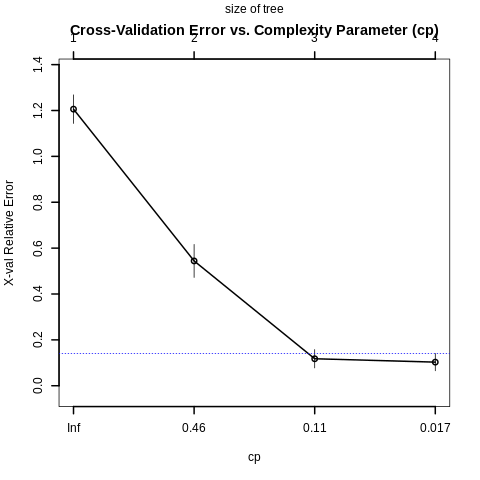

In [ ]:
%%R
plotcp(cart_model,
       main = "Cross-Validation Error vs. Complexity Parameter (cp)",
       col = "blue", lwd = 2)

#### Prune the tree

Pruning is a technique used to reduce the size of a regression tree by removing some of the branches that do not contribute much to the prediction accuracy. Pruning can help to avoid overfitting and improve the generalization performance of the model. Next, we'll prune the regression tree to find the optimal value to use for cp (the complexity parameter) that leads to the lowest test error. Use the `prune()` function to prune the tree to the desired complexity level. For example, to prune the tree to the level with the lowest cross-validated error.

Note that the optimal value for cp is the one that leads to the lowest `xerror` in the previous output, which represents the error on the observations from the cross-validation data.

First, identify best cp value to use:

In [ ]:
%%R
# Find optimal cp value from cross-validated error
cptable <- cart_model$cptable
opt_cp <- cptable[which.min(cptable[, "xerror"]), "CP"]
# We use use this cp value to prune the tree:
pruned_model <- prune(cart_model, cp = opt_cp)
cat("Optimal CP for Pruning:", opt_cp, "\n")

Optimal CP for Pruning: 0.01 


#### Visualize the Pruned Tree

We can use `rpart.plot()` function to plot the regression tree:


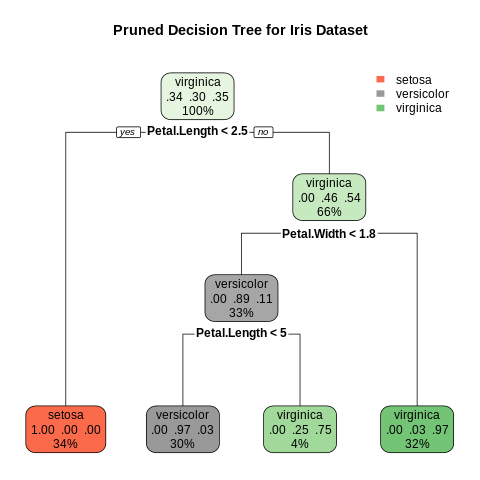

In [ ]:
%%R
rpart.plot(pruned_model, main = "Pruned Decision Tree for Iris Dataset",
           extra = 104, # Show class probabilities and counts
           fallen.leaves = TRUE)

#### Make Predictions

In [ ]:
%%R -w 500 -h 450 -u px
# Predict on the test data
predictions <- predict(pruned_model, newdata = test_data, type = "class")

In [ ]:
%%R
# Confusion matrix, proportion of cases
confusion_matrix <- table(test_data$Species, predictions)
confusion_matrix

            predictions
             setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         1
  virginica       0          0        13


In [ ]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.6888889 
Precision: 1 
Recall: 1 
Specificity: 1 
F1 Score: 1 


#### Variable Importance

The `rpart` package provides a convenient way to assess the importance of each predictor variable in the model. The `importance()` function calculates the importance of each variable based on the total decrease in node impurity (Gini Impurity or Entropy) that results from splits involving that variable.


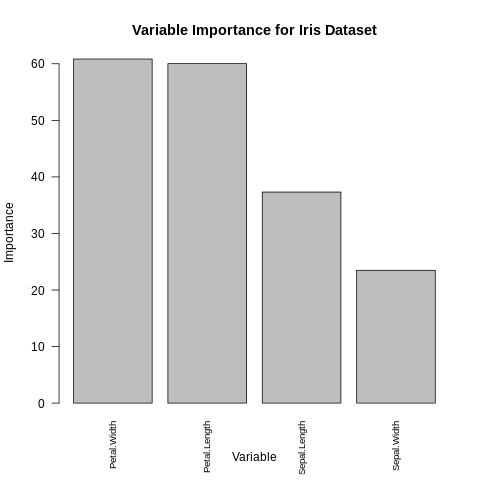

In [ ]:
%%R

var_imp <- pruned_model$variable.importance
if (is.null(var_imp)) {
  var_imp <- rep(0, ncol(train_data) - 1)
  names(var_imp) <- setdiff(names(train_data), "Species")
}
barplot(var_imp, main = "Variable Importance for Iris Dataset",
        xlab = "Variable", ylab = "Importance", las = 2, cex.names = 0.8)

### Regression Problem

In this section, we will implement a Decision Tree model for regression using the {rpart} package in R.

#### Data

We will use the `BostonHousing` dataset from the {mlbench} package. The dataset contains various features related to housing in Boston and their corresponding median house values. The goal is to predict the median house value based on the features.

In [ ]:
%%R
 # Load and prepare Boston Housing data
data(BostonHousing)
# Select subset of predictors and response
set.seed(123)
train_idx <- sample(1:nrow(BostonHousing), 0.7 * nrow(BostonHousing))
train_data <- BostonHousing[train_idx, ]
test_data <- BostonHousing[-train_idx, ]

#### Build the initial  tree



In [ ]:
%%R
cart_model <- rpart(medv ~ ., data = train_data,
                     method = "anova",
                     control = rpart.control(minsplit = 5, cp = 0.01))

#view results
printcp(cart_model)


Regression tree:
rpart(formula = medv ~ ., data = train_data, method = "anova", 
    control = rpart.control(minsplit = 5, cp = 0.01))

Variables actually used in tree construction:
[1] dis   lstat rm    tax  

Root node error: 29183/354 = 82.438

n= 354 

        CP nsplit rel error  xerror     xstd
1 0.424057      0   1.00000 1.00697 0.103213
2 0.210261      1   0.57594 0.73213 0.081064
3 0.076449      2   0.36568 0.42819 0.062301
4 0.076300      3   0.28923 0.39995 0.059143
5 0.058258      4   0.21293 0.36872 0.055376
6 0.026180      5   0.15468 0.32383 0.055802
7 0.014990      6   0.12850 0.30474 0.055523
8 0.010000      7   0.11351 0.30130 0.064065


We can use the `plotcp()` function to visualize the cross-validated error for each level of tree complexity:

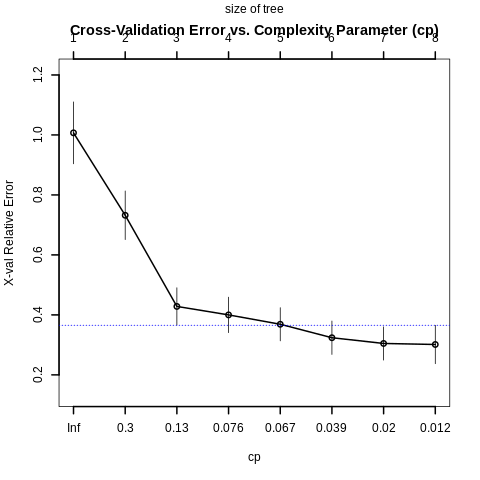

In [ ]:
%%R
plotcp(cart_model,
       main = "Cross-Validation Error vs. Complexity Parameter (cp)",
       col = "blue", lwd = 2)

#### Prune Tree

In [ ]:
%%R
cptable <- cart_model$cptable
opt_cp <- cptable[which.min(cptable[, "xerror"]), "CP"]
pruned_model <- prune(cart_model, cp = opt_cp)
cat("Optimal CP for Pruning:", opt_cp, "\n")

Optimal CP for Pruning: 0.01 


#### Plot tree

We can use rpart.plot() function to plot the regression tree:

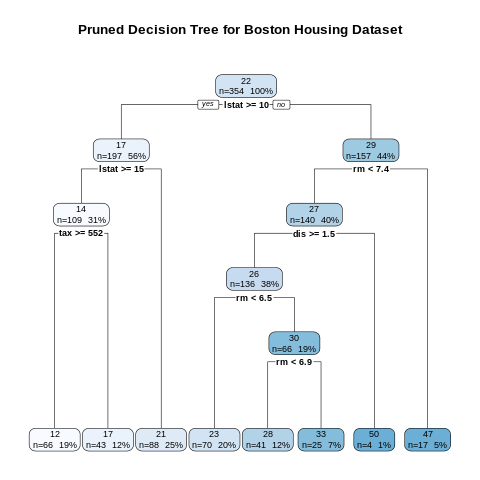

In [ ]:
%%R
rpart.plot(pruned_model, main = "Pruned Decision Tree for Boston Housing Dataset",
           extra = 101, # Show predicted values
           fallen.leaves = TRUE)

#### Prediction

In [ ]:
%%R
predictions <- predict(pruned_model, newdata = test_data)

In [ ]:
%%R
mse <- mean((predictions - test_data$medv)^2)
cat("Regression MSE:", mse, "\n")

Regression MSE: 21.31963 


#### Variable Importance

The {rpart} package provides a convenient way to assess the importance of each predictor variable in the model. The importance() function calculates the importance of each variable based on the total decrease in node impurity (Gini Impurity or Entropy) that results from splits involving that variable.

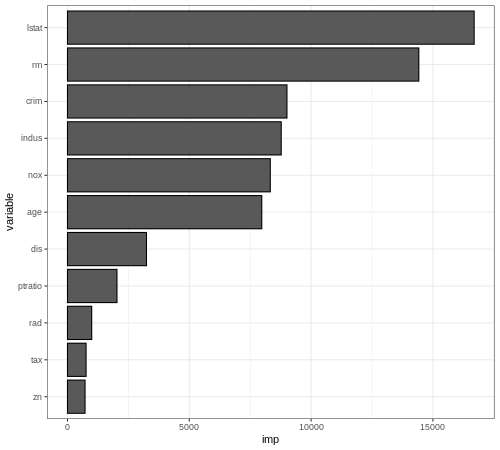

In [ ]:
%%R -w 500 -h 450 -u px
# Extract variable importance from the pruned model
importance <- data.frame(imp = pruned_model$variable.importance)
importance.df <- importance %>%
  tibble::rownames_to_column() %>%
  dplyr::rename("variable" = rowname) %>%
  dplyr::arrange(imp) %>%
  dplyr::mutate(variable = forcats::fct_inorder(variable))
# plot variable importance
ggplot2::ggplot(importance.df) +
  geom_col(aes(x = variable, y = imp),
           col = "black", show.legend = F) +
  coord_flip() +
  scale_fill_grey() +
  theme_bw()

In [ ]:
%%R
# define variables
    TP <- confusion_matrix[2, 2]
    TN <- confusion_matrix[1, 1]
    FP <- confusion_matrix[2, 1]
    FN <- confusion_matrix[1, 2]

    # accuracy
    accuracy <- (TP + TN) / sum(confusion_matrix)

    # precision
    precision <- TP / (TP + FP)

    # Recall
    recall <- TP / (TP + FN)

    # specificity
    specificity <- TN / (TN + FP)

    # f1_score
    f1_score <- 2 * (precision * recall) / (precision + recall)

    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("Specificity:", specificity, "\n")
    cat("F1 Score:", f1_score, "\n")

Accuracy: 0.775 
Precision: 0.9615385 
Recall: 0.7575758 
Specificity: 0.8571429 
F1 Score: 0.8474576 


## Summary and Conclusion

Decision Trees are powerful, interpretable models for classification and regression, splitting data based on feature thresholds to create decision rules. They use metrics like Gini Impurity or MSE to guide splits and produce intuitive tree structures. The diagrams above illustrate how trees partition data into regions, making predictions based on leaf node outputs. By understanding the mathematical foundations and visualizing the tree, you can effectively apply Decision Trees to real-world problems.

A decision tree is a predictive modeling technique used in machine learning and data mining to represent decisions and their potential outcomes. It has a tree-like structure where internal nodes represent tests on attributes; branches indicate possible outcomes and leaf nodes show the final decision. The main idea is to divide the dataset into smaller subsets based on input feature values until each subset contains only instances of a single class (for classification) or a single predicted value (for regression). This process, called recursive partitioning, involves selecting the best feature to split the data at each node.

This tutorial provided a comprehensive overview of Decision Trees, including their mathematical foundations, implementation in R, and practical applications. We explored both classification and regression tasks, demonstrating how to build, visualize, and evaluate Decision Trees using the {rpart} package. The tutorial also highlighted the importance of feature selection and model evaluation metrics. By following the examples and explanations, you should now have a solid understanding of how to apply Decision Trees to your own datasets. Remember to experiment with different parameters and techniques to optimize your models for specific tasks.


## References

1.  Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (1986). Classification and regression trees. Wadsworth and Brooks/Cole Advanced Books & Software.

2.  Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction (Vol. 2). Springer Science & Business Media.

3.  James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112). New York: Springer.

4.  Quinlan, J. R. (1986). Induction of decision trees. Machine learning, 1(1), 81-106.


5.  [Machine Learning in R: Decision Trees](https://www.datacamp.com/tutorial/decision-trees-R)

6.  [Decision Tree Essentials in R](http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-decision-tree-essentials/)
